**LSTM stock price prediction**

In [88]:
import math
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM

# ('YYYY-MM-DD')
stock_data = yf.download('AAPL', start='2021-01-01', end='2023-03-01')
stock_data.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.680023,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.258636,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.907555,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.169830,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.284714,105158200


**Visualizing Stock Prices History**

Text(0, 0.5, 'Prices ($)')

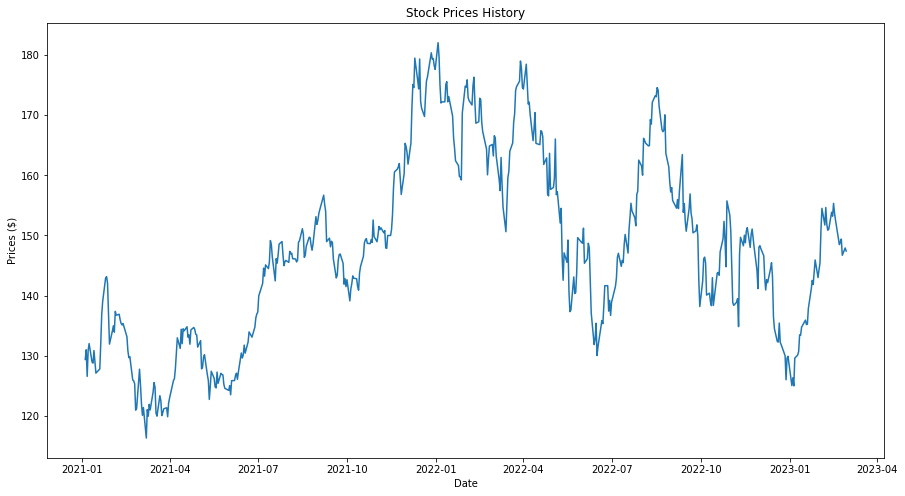

In [89]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

**Data Preprocessing**

In [90]:
closing_prices = stock_data['Close']
values = closing_prices.values

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(values.reshape(-1,1))

# Create sequences of length 60
seq_length = 60
X = []
y = []
for i in range(seq_length, len(scaled_prices)):
    X.append(scaled_prices[i-seq_length:i, 0])
    y.append(scaled_prices[i, 0])

X = np.array(X)
y = np.array(y)

# Reshape the input data for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

**Setting Up LSTM Network Architecture**

In [91]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=100))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
482/482 [==============================] - 38s 52ms/step - loss: 0.0109
Epoch 2/10
482/482 [==============================] - 20s 41ms/step - loss: 0.0049
Epoch 3/10
482/482 [==============================] - 19s 40ms/step - loss: 0.0039
Epoch 4/10
482/482 [==============================] - 21s 44ms/step - loss: 0.0038
Epoch 5/10
482/482 [==============================] - 20s 42ms/step - loss: 0.0036
Epoch 6/10
482/482 [==============================] - 20s 42ms/step - loss: 0.0027
Epoch 7/10
482/482 [==============================] - 20s 42ms/step - loss: 0.0028
Epoch 8/10
482/482 [==============================] - 19s 40ms/step - loss: 0.0029
Epoch 9/10
482/482 [==============================] - 20s 42ms/step - loss: 0.0026
Epoch 10/10
482/482 [==============================] - 19s 39ms/step - loss: 0.0030


**Model makes Predictions**

In [92]:
# Use the model to make predictions for the next 14 days
next_days = []
for i in range(14):
    last_seq = values.reshape(-1,1)[-seq_length:]
    last_seq_scaled = scaler.transform(last_seq)
    next_day_scaled = model.predict(np.array([last_seq_scaled]))
    next_day = scaler.inverse_transform(next_day_scaled)[0][0]
    next_days.append(next_day)
    values = np.append(values.reshape(-1,1), [[next_day]], axis=0)

1/1 [==============================] - 0s 162ms/step


**Make Prediction Dates**

In [93]:
dates = closing_prices.index
last_date = dates[-1]

# get the last date in the index
last_date = closing_prices.index[-1]

# create an array of the next 14 days
date_range = pd.date_range(last_date, periods=14, freq='D')

#date_range_formatted = date_range.strftime('%Y-%m-%d')
# convert the array to a numpy array
date_range_array = np.array(date_range)

concatenated_array = np.concatenate([dates, date_range_array])

**Visualizing the Predicted Price**

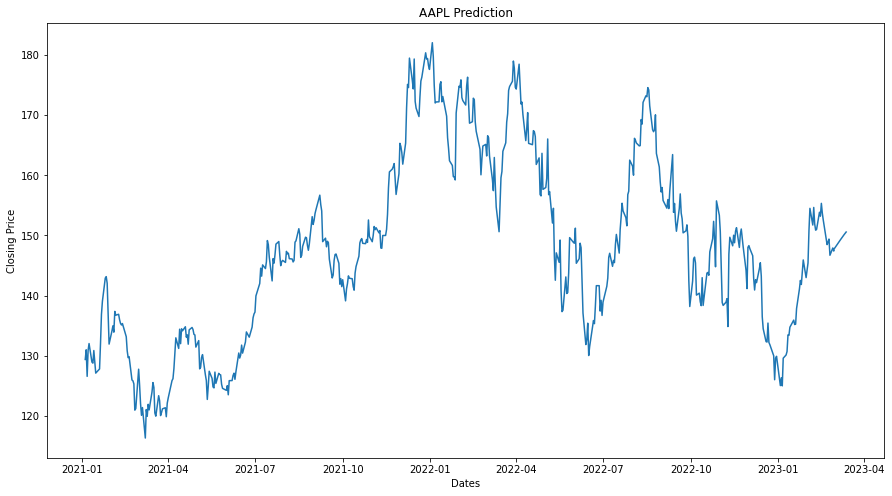

In [94]:
plt.figure(figsize=(15,8))
plt.plot(concatenated_array, values)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.title('AAPL Prediction')
plt.show()

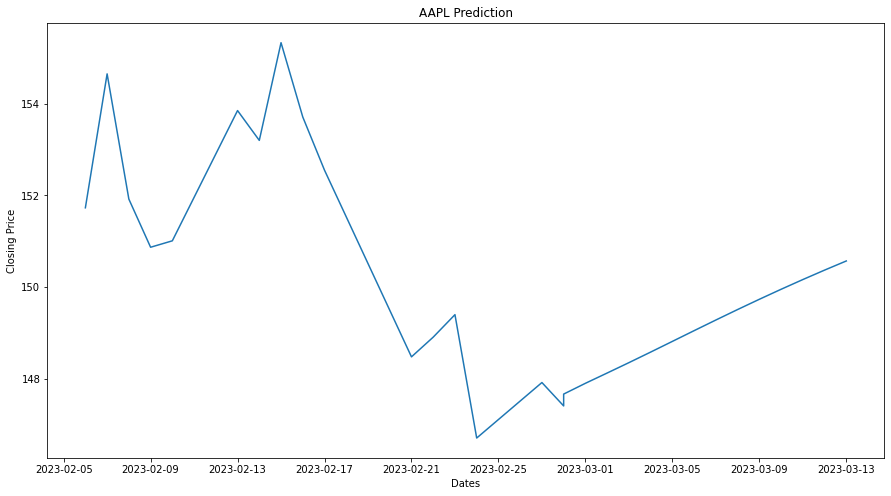

In [95]:
plt.figure(figsize=(15,8))
plt.plot(concatenated_array[-30:], values[-30:])
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.title('AAPL Prediction')
plt.show()
